Import the necessary packages

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import calendar
from datetime import datetime


Import the dataset for analysing


In [57]:
data=pd.read_csv("/content/drive/MyDrive/Machine learning algorithms/Uber Drives - .csv")
data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [58]:
data.isnull().sum()

,0
START_DATE*,0
END_DATE*,1
CATEGORY*,1
START*,1
STOP*,1
MILES*,0
PURPOSE*,503


In [34]:
data.dtypes

,0
START_DATE,object
END_DATE,object
CATEGORY,object
START,object
STOP,object
MILES,object
PURPOSE,object


In [60]:
data=data.dropna()

In [61]:
data.dtypes

,0
START_DATE*,object
END_DATE*,object
CATEGORY*,object
START*,object
STOP*,object
MILES*,float64
PURPOSE*,object


In [67]:
data['START_DATE*']=pd.to_datetime(data['START_DATE*'], format='%m/%d/%Y %H:%M')
data['END_DATE*']=pd.to_datetime(data['END_DATE*'], format='%m/%d/%Y %H:%M')


<ipython-input-67-f9467354491e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['START_DATE*']=pd.to_datetime(data['START_DATE*'], format='%m/%d/%Y %H:%M')
<ipython-input-67-f9467354491e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['END_DATE*']=pd.to_datetime(data['END_DATE*'], format='%m/%d/%Y %H:%M')


In [68]:
data.dtypes

,0
START_DATE*,datetime64[ns]
END_DATE*,datetime64[ns]
CATEGORY*,object
START*,object
STOP*,object
MILES*,float64
PURPOSE*,object


In [71]:
Hour=[]
day=[]
month=[]
dayofWeek=[]
weekday=[]
for x in data['START_DATE*']:
  Hour.append(x.hour)
  day.append(x.day)
  dayofWeek.append(x.dayofweek)
  month.append(x.month)
  weekday.append(calendar.day_name[dayofWeek[-1]])
data['HOUR']=Hour
data['DAY']=day
data['DAYOFWEEK']=dayofWeek
data['MONTH']=month
data['WEEKDAY']=weekday

<ipython-input-71-1efb9c3884f4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HOUR']=Hour
<ipython-input-71-1efb9c3884f4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DAY']=day
<ipython-input-71-1efb9c3884f4>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [72]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAYOFWEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


In [74]:
data['CATEGORY*'].value_counts()

,count
CATEGORY*,
Business,647
Personal,6


<Axes: xlabel='CATEGORY*', ylabel='count'>

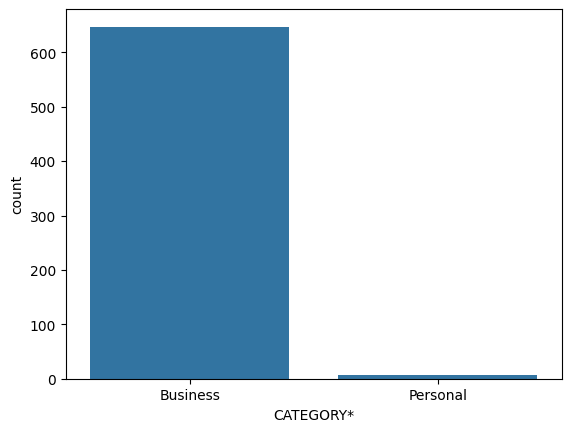

In [76]:
sns.countplot(x='CATEGORY*',data=data)

<Axes: ylabel='Frequency'>

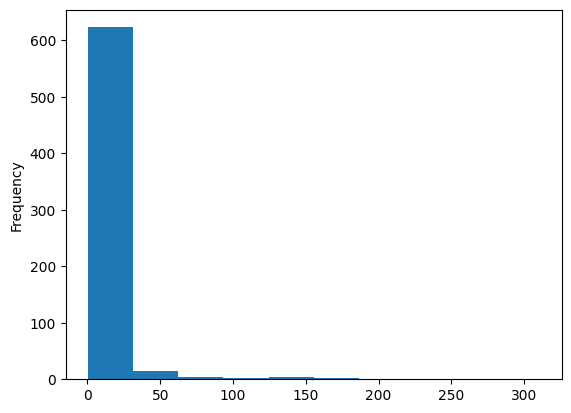

In [77]:
#how long do people travel with uber
data['MILES*'].plot.hist()

Text(0.5, 1.0, 'NUmber of trips vs Hours')

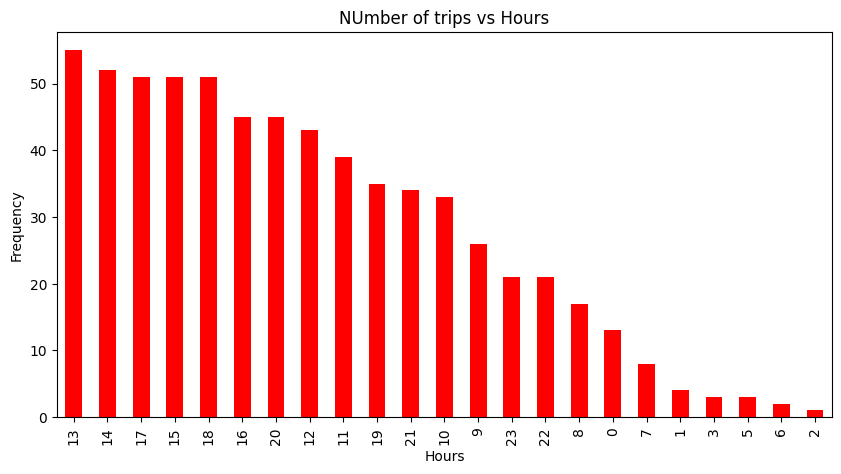

In [83]:
#what hour do people like booking their destinaation?
Hours=data["START_DATE*"].dt.hour.value_counts()
Hours.plot(kind='bar',color='red',figsize=(10,5))
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.title("NUmber of trips vs Hours")

most people like booking in after like 13(1pm)

Text(0.5, 1.0, 'NUmber of trips vs Purpose')

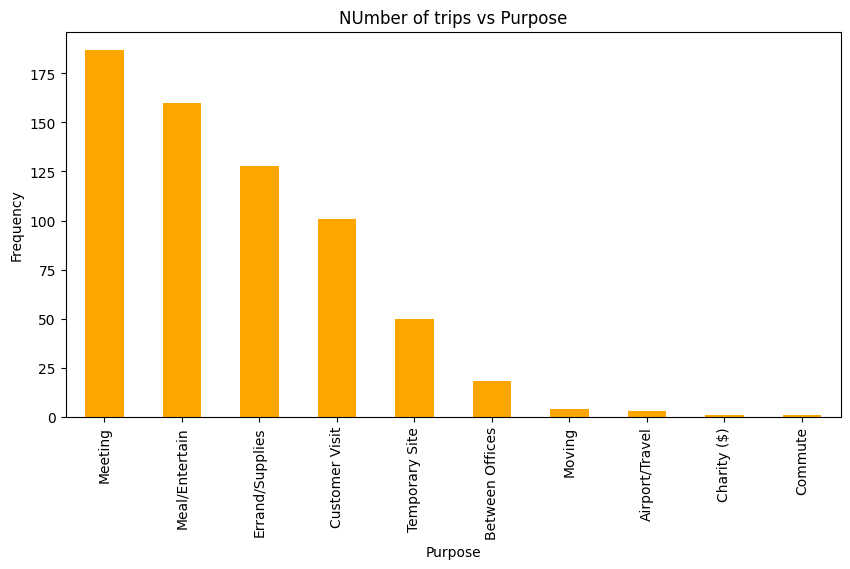

In [84]:
#check the purpose of trips
data['PURPOSE*'].value_counts().plot(kind='bar',color='orange',figsize=(10,5))
plt.xlabel("Purpose")
plt.ylabel("Frequency")
plt.title("NUmber of trips vs Purpose")

<Axes: xlabel='WEEKDAY'>

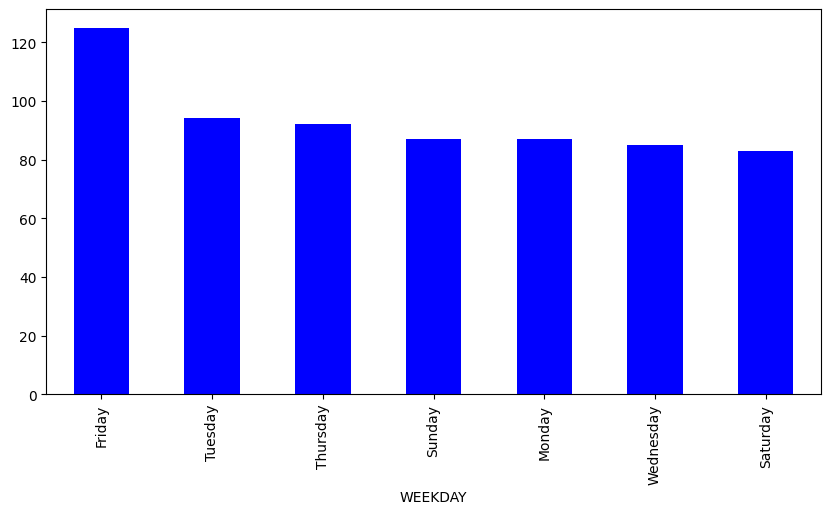

In [86]:
data['WEEKDAY'].value_counts().plot(kind='bar',color='Blue',figsize=(10,5))


<Axes: xlabel='DAY'>

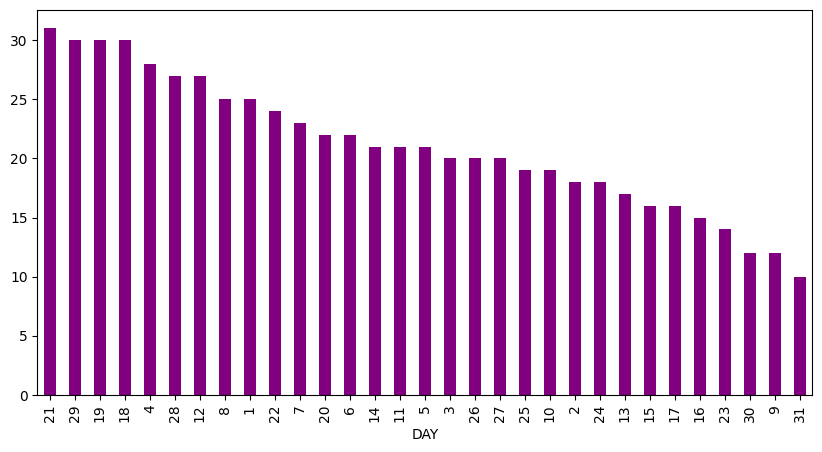

In [88]:
#no of trips per each day in the month like (21st of month)
data['DAY'].value_counts().plot(kind='bar',color='purple',figsize=(10,5))

<Axes: xlabel='MONTH'>

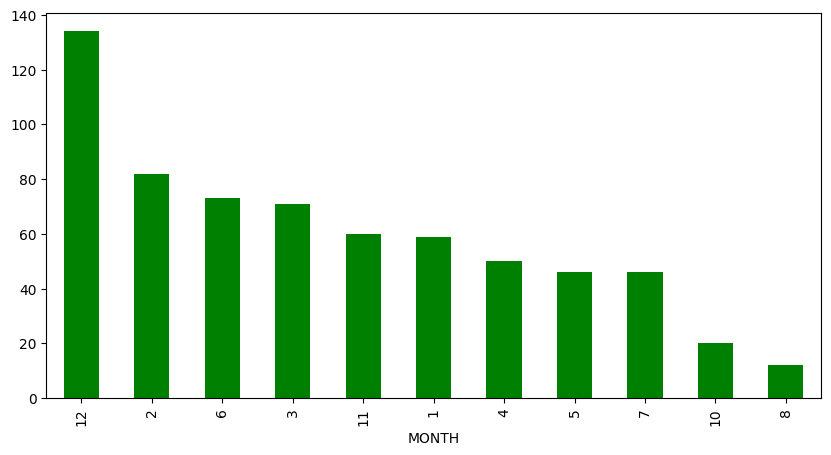

In [93]:
#what are the trips in month
data['MONTH'].value_counts().plot(kind='bar',color='GREEN',figsize=(10,5))

<Axes: xlabel='START_DATE*'>

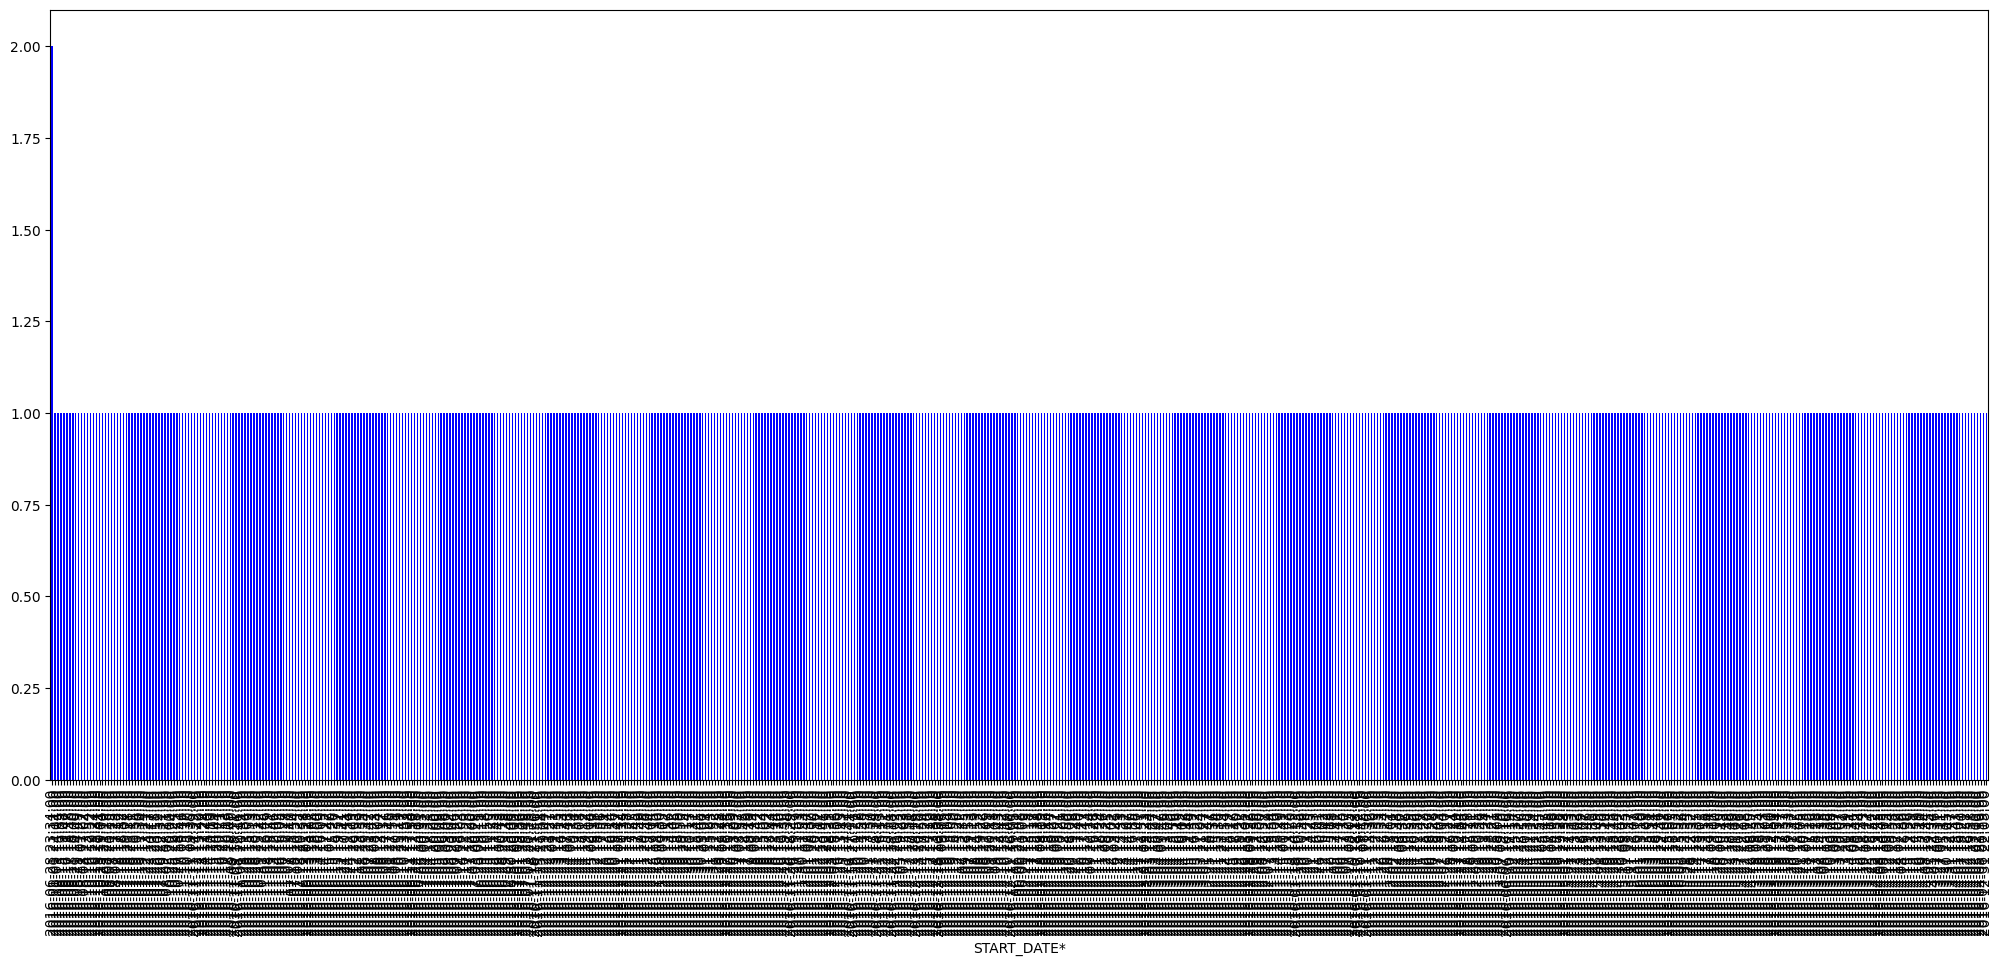

In [95]:
#the starting point of the trips
data['START_DATE*'].value_counts().plot(kind='bar',color='Blue',figsize=(25,10))